In [8]:
import pandas as pd

df = pd.read_table('ratings_train.txt')
df.drop_duplicates(keep='first',inplace=True)
df.dropna(subset='document',inplace=True)
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [2]:
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [3]:
df['document']

0                                       아 더빙.. 진짜 짜증나네요 목소리
1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2                                         너무재밓었다그래서보는것을추천한다
3                             교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
                                ...                        
149995                                  인간이 문제지.. 소는 뭔죄인가..
149996                                        평점이 너무 낮아서...
149997                      이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
149999                             한국 영화 최초로 수간하는 내용이 담긴 영화
Name: document, Length: 149995, dtype: object

In [7]:
from konlpy.tag import Okt
import collections
okt = Okt()

temp_list=[]

for sentence in df['document']:
    s_list = okt.pos(sentence)
    for word, tag in s_list:
        if tag in ['Noun','Adjective']:
            temp_list.append(word)
counts = collections.Counter(temp_list)
tag = counts.most_common(10)
tag

[('영화', 50737),
 ('정말', 9645),
 ('진짜', 8343),
 ('이', 8001),
 ('점', 7930),
 ('연기', 6434),
 ('평점', 6324),
 ('것', 6315),
 ('최고', 6035),
 ('스토리', 5344)]

In [5]:
from wordcloud import WordCloud
#wc=WordCloud(font_path=font_path,background_color='skyblue', max_font_size=60)
wc=WordCloud(font_path='malgun',background_color='skyblue', max_font_size=60)
cloud=wc.generate_from_frequencies(dict(tag))
cloud

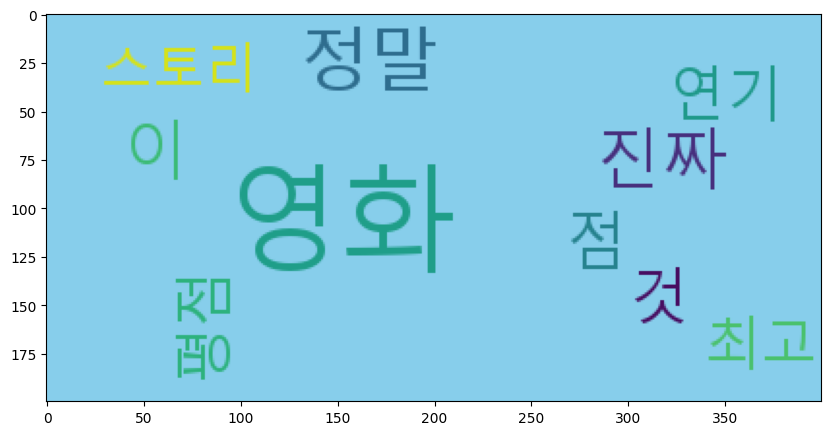

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.imshow(cloud)